# D209 Data Mining I Performance Assessment Task 2
By Matthew Heino

### Purpose:
This is a Jupyter Notebook for the D209 assessment for Data Mining I.  This notebook will be used in conjunction with a written document to explore data.  Concepts that will be explored in this notebook will be:
- Creation of a Decision Tree Regressor
- Data preparation 
- Identifying independent and dependent variables that are applicable to a question.
- Data transformation, transforming data into a form that cn be used on a linear regression.

**Note:** Code that has references uses the APA citation can be found in the Word document that accompanies this Jupyter Notebook.

## Pre-assessment tasks:
        
        1. Read the data from the CSV.
        2. Get a feel for what the data contains. Print the first five 
        rows of the data frame.
        3. Print some information aboutthe dataframe. 

In [1]:
import math
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Read in the Data from the CSV file.
pd.set_option('display.max_columns', 11)

# CSV columns that contain the desired features for the analysis.
feature_cols= ['Age','Gender','VitD_levels', 'TotalCharge', 'Initial_days','Initial_admin'
               , 'Additional_charges']

medical_df = pd.read_csv('medical_clean.csv',usecols=feature_cols)

In [3]:
# Print the first five rows of the dataframe
print(medical_df.head(5))

   Age  Gender  VitD_levels        Initial_admin  Initial_days  TotalCharge  \
0   53    Male    19.141466  Emergency Admission     10.585770  3726.702860   
1   51  Female    18.940352  Emergency Admission     15.129562  4193.190458   
2   53  Female    18.057507   Elective Admission      4.772177  2434.234222   
3   78    Male    16.576858   Elective Admission      1.714879  2127.830423   
4   22  Female    17.439069   Elective Admission      1.254807  2113.073274   

   Additional_charges  
0        17939.403420  
1        17612.998120  
2        17505.192460  
3        12993.437350  
4         3716.525786  


In [4]:
# print some information about the dataframe.
print("Medical dataframe information: \n" , medical_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Gender              10000 non-null  object 
 2   VitD_levels         10000 non-null  float64
 3   Initial_admin       10000 non-null  object 
 4   Initial_days        10000 non-null  float64
 5   TotalCharge         10000 non-null  float64
 6   Additional_charges  10000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 547.0+ KB
Medical dataframe information: 
 None


# A. Research Question.
1. The research question will be discussed in the written document that accompanies this Jupyter Notebook.  
2. The goals of the analysis will be be discussed in the written document.

# B. Justification 
All B sections will be found in the written document that accompanies this Jupyter Notebook.

# C Data Preparation 
This section will contain the code that will be used to clean and prepare the data that will be used in subsequent sections of this assessment.  Any questions that require text based answers will be included in the accompanying document.

Code included in this section:
 - Code to look for duplicates in the dataframe
 - Code to look for missing values
 - Code for creating summary statistics for the features.

## C1 & C2.  
These sections can be found in the Word documnet that accompanies this Jupiter Notebook.

## C3. Steps used to Prepare the Data.

### Looking for duplicates in the dataframe. 

In [5]:
# Step 1. Check for duplicates in the dataset. *******************************
medical_dups = medical_df[medical_df.duplicated()]
print("Duplicated rows: \n",medical_dups)

Duplicated rows: 
 Empty DataFrame
Columns: [Age, Gender, VitD_levels, Initial_admin, Initial_days, TotalCharge, Additional_charges]
Index: []


#### No dupplicates found in set.

### Step 2. Look for missing values. 

In [6]:
#Step 2
# Count the number of missing values for the dataframe.
# Check if there are missing values in dataset
print("\nAre there any missing values: ",medical_df.isnull().values.any())
print("\nTotal missing values: \n", medical_df.isnull().sum())


Are there any missing values:  False

Total missing values: 
 Age                   0
Gender                0
VitD_levels           0
Initial_admin         0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64


Display a visual of no missing values.

AxesSubplot(0.125,0.11;0.698618x0.77)


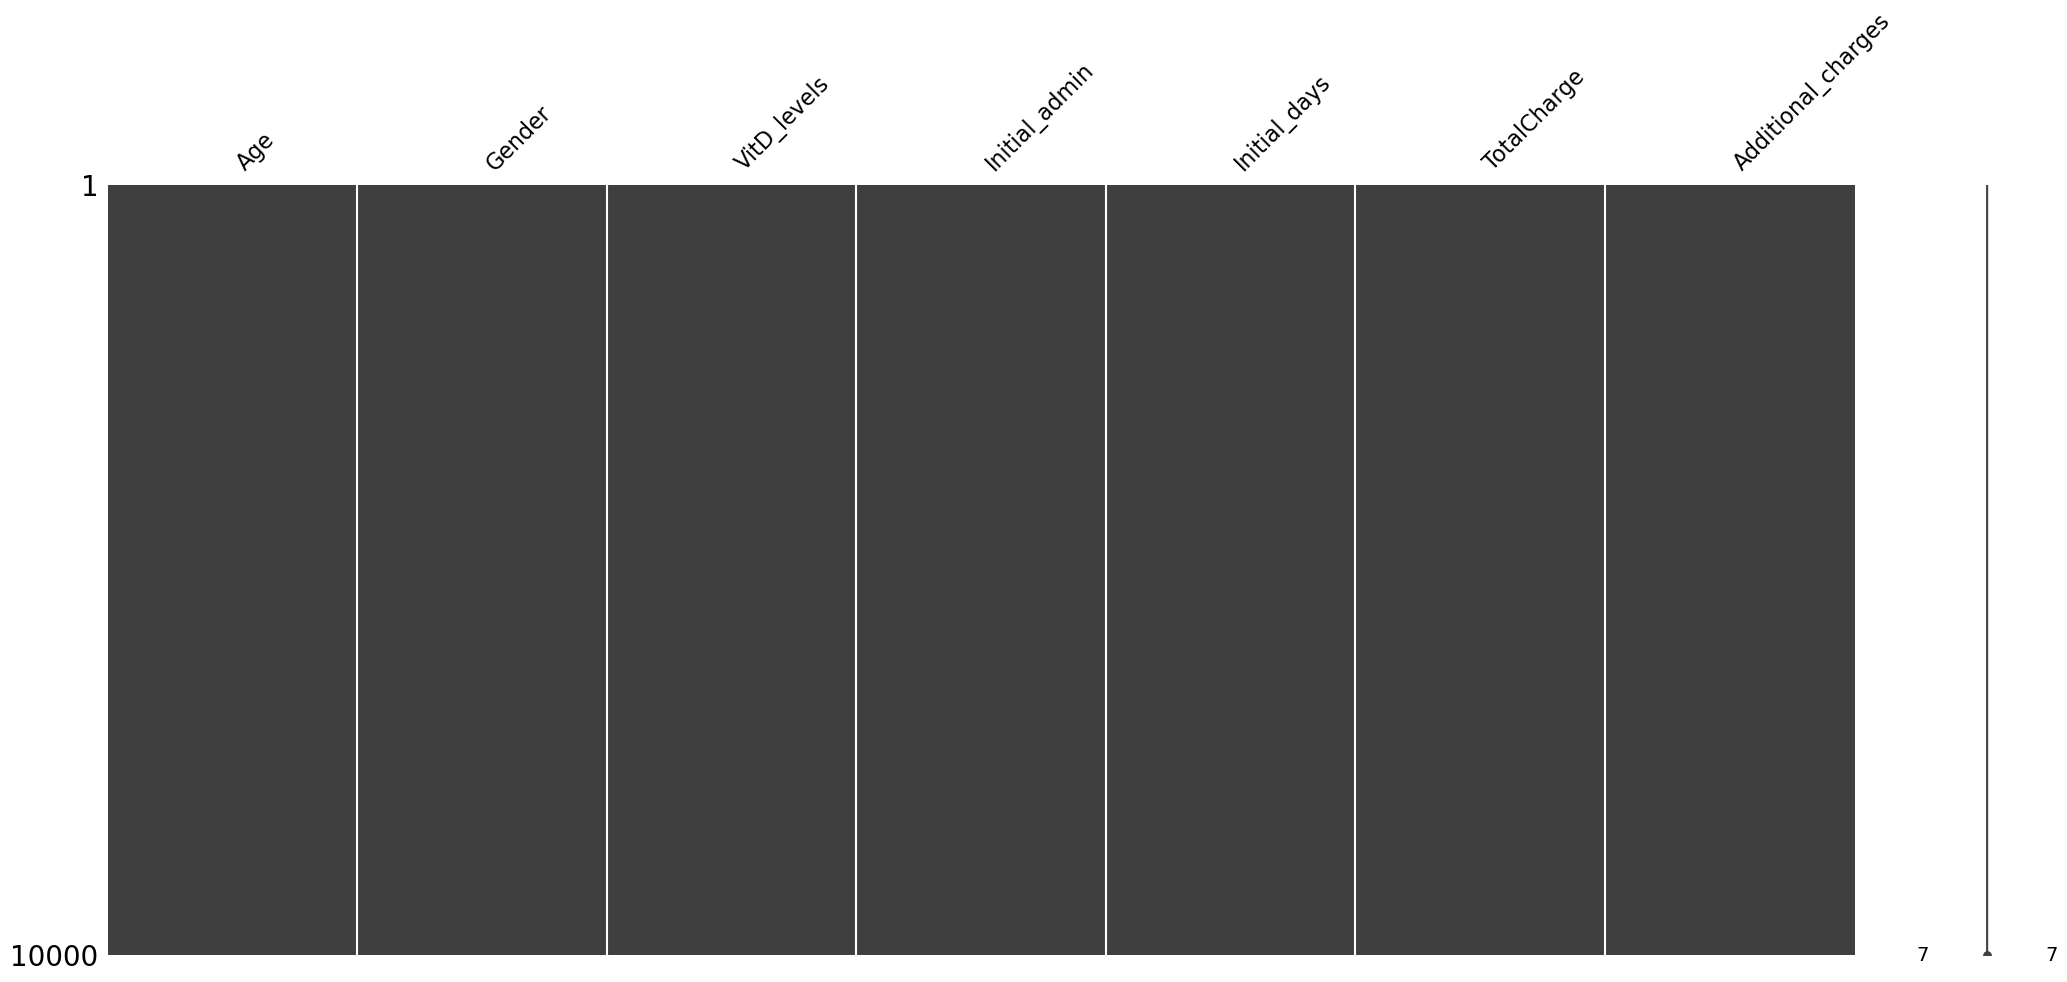

In [7]:
# Create a missing matrix using Missingno library.
print(msno.matrix(medical_df))

No missing values were found!

 ## Step 3: Summary Statistics for the Chosen Features
This section will display some of the statisitics for the features. There is a section for both the continuous and the categorical features of the dataframe.

In [8]:
# Summary Statistics for Features ********************************************

medical_cont_cols = medical_df.select_dtypes(include='number').columns

for col_name in medical_cont_cols:
    print("\nThe summary statistics for ", col_name)
    print(medical_df[col_name].describe())

medical_cat_cols = medical_df.select_dtypes(include='object').columns

for col_name in medical_cat_cols:
    print("\n\nThe summary statistics for ", col_name)
    print(medical_df[col_name].describe())
    print("\n",medical_df.groupby([col_name]).size())


The summary statistics for  Age
count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

The summary statistics for  VitD_levels
count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

The summary statistics for  Initial_days
count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

The summary statistics for  TotalCharge
count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

The summa

## Step 4: Data Transformation
Encode the categorical variables using either map() or pandas get_dummies() methods.  
**Note:**  This was an experimentation into different ways to encode the categorical variables.

In [9]:
# Transform the categorical variables into their numeric equivalent.
# C4 Transform the categorical variables.
medical_cats_cols = medical_df.select_dtypes(include='object').columns
yes_no_map ={"Yes": 1, "No": 0}

for name in medical_cats_cols:
    if len(medical_df[name].unique()) > 2:
        medical_df =   pd.get_dummies(medical_df
               ,columns = [name]
               ,drop_first = False,
               prefix = name
               )
    else:
        medical_df[name] = medical_df[name].map(yes_no_map)

In [10]:
print("\n\n\n Medical Info: ",medical_df.info())
print(medical_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  int64  
 1   VitD_levels                          10000 non-null  float64
 2   Initial_days                         10000 non-null  float64
 3   TotalCharge                          10000 non-null  float64
 4   Additional_charges                   10000 non-null  float64
 5   Gender_Female                        10000 non-null  uint8  
 6   Gender_Male                          10000 non-null  uint8  
 7   Gender_Nonbinary                     10000 non-null  uint8  
 8   Initial_admin_Elective Admission     10000 non-null  uint8  
 9   Initial_admin_Emergency Admission    10000 non-null  uint8  
 10  Initial_admin_Observation Admission  10000 non-null  uint8  
dtypes: float64(4), int64(1), uint

The categorical values have been encoded to their numerical equivalents.

In [11]:
# split the data.
# Create a pandas frame for the X 
X = medical_df.drop(['Initial_days'], axis=1)

# Create a pandas series for y.
y = medical_df['Initial_days']

### Step 9: SelectKBest
Use SelectKBest to get features to be used in the model. Citation: (Sklearn.Feature_Selection.SelectKBest, n.d.)

In [12]:
# Create the SelectKBest Feature selector.

feat_sel = SelectKBest(f_regression, k='all')

# Fit the data sets to the feature selector.
feat_sel.fit_transform(X, y)

# Create a dataframewith the p-vlaues of the features.
# in sorted order
feat_pval = pd.DataFrame({'Feature': X.columns
                          , 'p_value' : feat_sel.pvalues_}).sort_values('p_value')

# Could not find features with a p-value less than or equal to 0.05.
print(feat_pval[feat_pval['p_value'] < 1.0])

selected_features = feat_pval[feat_pval['p_value'] < .6]

new_med_df = X[selected_features['Feature'].values].copy()

print(new_med_df.shape)

# add the Initial_days column.
new_med_df['Initial_days']  = y

print(new_med_df.head(5))
print(new_med_df.shape)

                               Feature   p_value
2                          TotalCharge  0.000000
0                                  Age  0.103879
8    Initial_admin_Emergency Admission  0.256477
7     Initial_admin_Elective Admission  0.315427
4                        Gender_Female  0.428898
5                          Gender_Male  0.502620
3                   Additional_charges  0.659332
6                     Gender_Nonbinary  0.674840
1                          VitD_levels  0.715757
9  Initial_admin_Observation Admission  0.757748
(10000, 6)
   TotalCharge  Age  Initial_admin_Emergency Admission  \
0  3726.702860   53                                  1   
1  4193.190458   51                                  1   
2  2434.234222   53                                  0   
3  2127.830423   78                                  0   
4  2113.073274   22                                  0   

   Initial_admin_Elective Admission  Gender_Female  Gender_Male  Initial_days  
0                    

## C4. Copy of Cleaned Dataset.
This is the code that is used to create the clean dataset.  It will saved to file and will be read from to create the model. 

In [13]:
## Ouput to the cleaned data set to the CSV file.
new_med_df.to_csv('Heino_Cleaned_Medical_Task_2.csv', index = False, header = True)

## D1. Split the Cleaned Dataset.
Tasks:
- Read in the cleaned data set inot a new frame
- Split the datset into the train and test samples.

In [14]:
#Read the cleaned file into a new dataframe.
medical_mod_df = pd.read_csv('Heino_Cleaned_Medical_Task_2.csv')
#print(medical_mod_df.head())
print(medical_mod_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   TotalCharge                        10000 non-null  float64
 1   Age                                10000 non-null  int64  
 2   Initial_admin_Emergency Admission  10000 non-null  int64  
 3   Initial_admin_Elective Admission   10000 non-null  int64  
 4   Gender_Female                      10000 non-null  int64  
 5   Gender_Male                        10000 non-null  int64  
 6   Initial_days                       10000 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 547.0 KB
None


### Splitting the data into the training and test sets.

In [15]:
# Split the data into the training sets.
# Note: Do not use stratify with this when using continuous.  The Target is not
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8
                                                    ,test_size=0.2
                                                    , random_state=1911)

#### Save the split data into the appropriate files.

In [16]:
# Save the sets to the files.
X_train.to_csv('Heino_X_train_Task_2.csv', index = False, header = True)
X_test.to_csv('Heino_X_test_Task_2.csv', index = False, header = True)
y_train.to_csv('Heino_y_train_Task_2.csv', index = False, header = True) 
y_test.to_csv('Heino_y_test_Task_2.csv', index = False, header = True)

## D2. Description of the Analysis Technique.

In this section, the model will tuned and created.  The tuning will be done using GridSearchCV.  This class will run through a parameter list that is passed as an argument.  This class will run through this list of parameters trying different combinations of variables to get the right parameters to yield the best model.

#### Initial Model No Tuning.

In [17]:
# Initial Model no tuning.
dt2 = DecisionTreeRegressor()
dt2.fit(X_train, y_train)

y_preds2 = dt2.predict(X_test) 

mse2 = round(mean_squared_error(y_test, y_preds2), 2)
rmse2 = round(math.sqrt(mse2), 2)

print("\nThe MSE for the model (Untuned) is: ", mse2)
print("\nThe RMSE for the model (Untuned) is: ", rmse2)
print("The Coefficient of determination (R-squared): "
      , r2_score(y_test, y_preds2))


The MSE for the model (Untuned) is:  11.42

The RMSE for the model (Untuned) is:  3.38
The Coefficient of determination (R-squared):  0.9831705105470142


In [18]:
# Using Gridsearch.

#Define Grid.

param_grid_dt = { 'max_depth': [2,3, 5, 10, 15, 20, 100]
                 , 'min_samples_leaf':[.01,.02, .035, 0.04, 0.06, .08, .1] 
    }

dt = DecisionTreeRegressor(random_state=1911)

#Start GridSearch
dt_gscv = GridSearchCV(estimator=dt, param_grid= param_grid_dt
                       , cv=5)

#Fit the data.
dt_gscv.fit(X_train, y_train)

print(dt_gscv.best_estimator_)
print(dt_gscv.best_score_)
print(dt_gscv.best_params_)


DecisionTreeRegressor(max_depth=10, min_samples_leaf=0.01, random_state=1911)
0.9898007459108793
{'max_depth': 10, 'min_samples_leaf': 0.01}


### Create the Decision Treel with the best estimator value.
Using the modelthat was determined using GridSearchCV.  

In [19]:
best_mod = dt_gscv.best_estimator_
y_preds = best_mod.predict(X_test)

## E1.  Meaning of the Accuracy and Mean Squared Error.

#### The accuracy of the model.

In [20]:
mse = round(mean_squared_error(y_test, y_preds), 2)
rmse = round(math.sqrt(mse), 2)

In [21]:
print("\nThe MSE for the model is: ", mse)
print("\nThe RMSE for the model is: ", rmse)
print("The Coefficient of determination (R-squared): ", r2_score(y_test, y_preds))


The MSE for the model is:  7.11

The RMSE for the model is:  2.67
The Coefficient of determination (R-squared):  0.9895166170988252


In [22]:
print("Training:{0} ".format(best_mod.score(X_train, y_train)))
print("Testing:{0} ".format(best_mod.score(X_test, y_test)))

Training:0.9906042712324014 
Testing:0.9895166170988252 


#### Create a visual of the Decision Tree.

In [23]:
# Plot the tree (a text based representation of the model).
# Citation: (Sklearn.tree.export_text, n.d.)

text_rep = tree.export_text(best_mod)
print(text_rep)

|--- feature_2 <= 5259.56
|   |--- feature_2 <= 3569.39
|   |   |--- feature_2 <= 2911.32
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_2 <= 2422.77
|   |   |   |   |   |--- feature_2 <= 2298.56
|   |   |   |   |   |   |--- value: [2.11]
|   |   |   |   |   |--- feature_2 >  2298.56
|   |   |   |   |   |   |--- value: [3.34]
|   |   |   |   |--- feature_2 >  2422.77
|   |   |   |   |   |--- feature_2 <= 2754.95
|   |   |   |   |   |   |--- feature_2 <= 2639.23
|   |   |   |   |   |   |   |--- feature_3 <= 11507.51
|   |   |   |   |   |   |   |   |--- value: [5.11]
|   |   |   |   |   |   |   |--- feature_3 >  11507.51
|   |   |   |   |   |   |   |   |--- value: [4.47]
|   |   |   |   |   |   |--- feature_2 >  2639.23
|   |   |   |   |   |   |   |--- value: [5.68]
|   |   |   |   |   |--- feature_2 >  2754.95
|   |   |   |   |   |   |--- feature_2 <= 2852.29
|   |   |   |   |   |   |   |--- value: [6.34]
|   |   |   |   |   |   |--- feature_2 >  2852.29
|   |   |   |  

#### Create a visual of the Decision Tree.

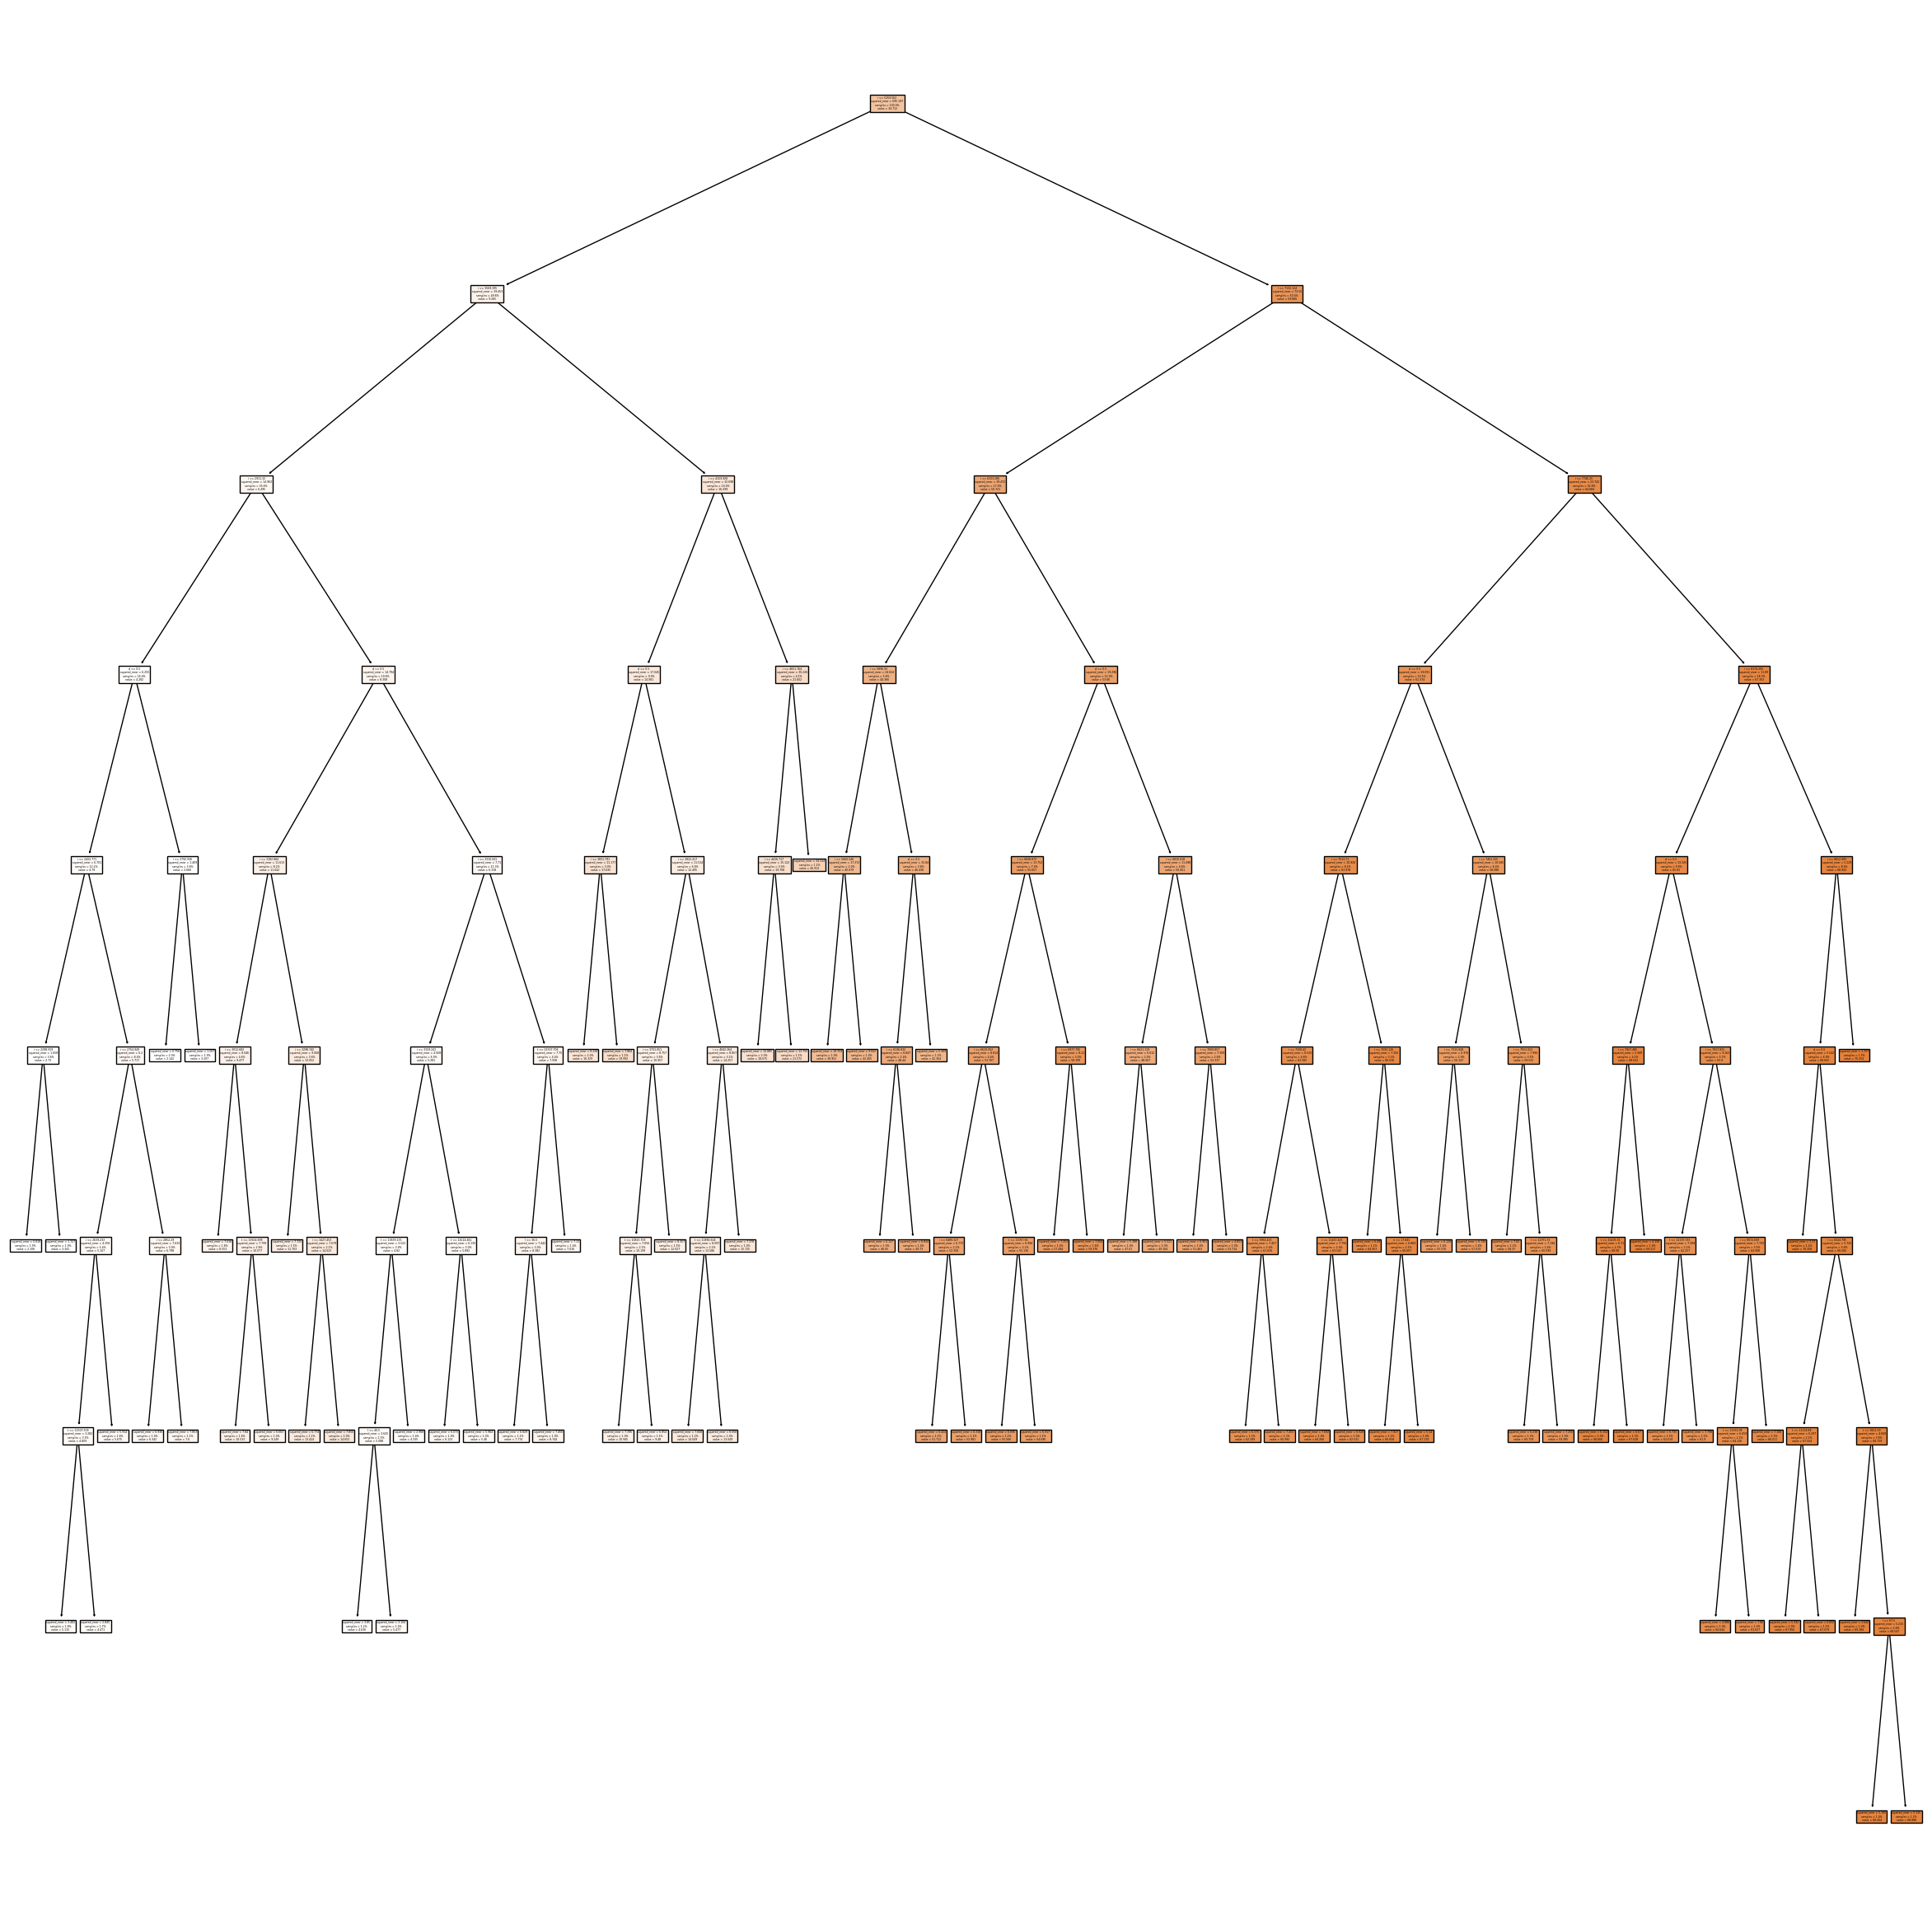

In [24]:
#Citation: (Sklearn.tree.plot_tree, n.d.)
plt.figure(figsize=(30, 30))

feature_names_med = medical_mod_df.columns

tree.plot_tree(best_mod,feature_names=list(feature_names_med).pop(), class_names=True, filled=True, proportion=True)
plt.show()
